In [1]:
import pandas as pd 
import matplotlib.pyplot as mp
import numpy
import tkinter as tk 
from tkinter import filedialog, Text
import os

<AxesSubplot:title={'center':'Herkenning vs Deep learning score'}, ylabel='Files'>

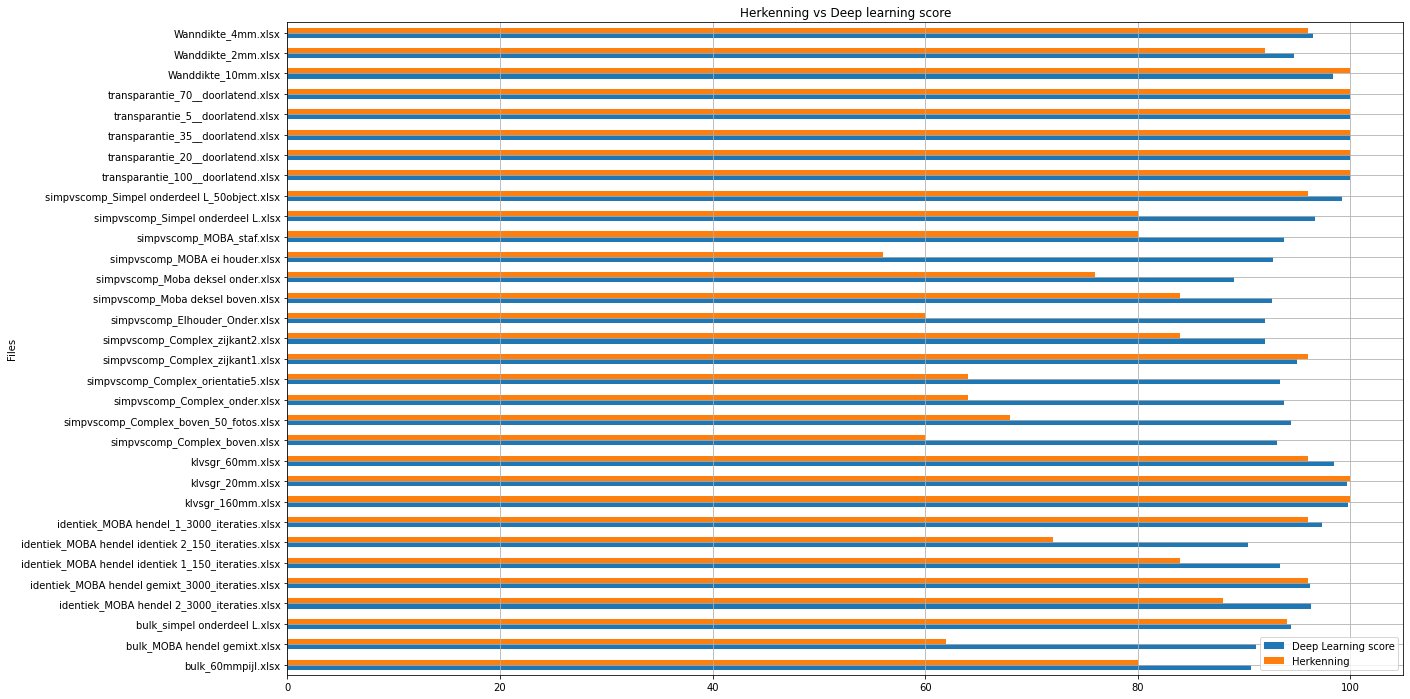

In [2]:
#This program plots a graph where the deep learning and recognition can be compared
#Author: Arie Hoekstra

#Directory we want to search
directory = "Excel Resultaten"
#List to store all the files with path
excel = []
#List with just the file names
files = []
y = 0

#Loop over all the files in the directory    
for file in os.listdir(directory):
    #decode
     filename = os.fsdecode(file)
     if filename.endswith(".xlsx"):
         #store path to file in temp variable
         temp = os.path.join(directory, filename) 
         #insert into the excel
         excel.insert(y, temp)
         y = y + 1
         continue
     else:
         continue

i = 0
#Lists to store all values
dl_scores = []
recogniton = []

#Loop over all the excel sheets
for sheet in excel:
    #Select the D column (Deep learning)
    df = pd.read_excel(sheet, usecols="D")
    #Round values with 1 decimal
    rounded_dl_scores = round(df.iat[25,0], 3) * 100
    dl_scores.insert(i, rounded_dl_scores)

    #Use recognition column
    df = pd.read_excel(sheet, usecols="G")
    recogniton.insert(i, (df.iat[27,0] * 100))
    #Delete directory from path
    files.insert(i, sheet.replace('Excel Resultaten\\', ''))
    i = i + 1


#Create dataframe
df = pd.DataFrame()
#Add three columns with the names and the corresponding values
df['Deep Learning score'] = dl_scores
df['Herkenning'] = recogniton
df['Files'] = files

#Export dataframe to excel 
df.to_excel('totalscore.xlsx', index=False)

#Get data from the excel
df = pd.read_excel('totalscore.xlsx')
#Plot the graph
df.plot(x='Files', kind="barh", figsize=(20,12), xlabel="Files", ylabel = "Values", title="Herkenning vs Deep learning score", grid=True)